In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit

## VIII.1 Importieren und grafische Dartsellung der Messdaten

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

In [3]:
t,x,y=np.loadtxt('data/Messung.dat', skiprows=1, usecols=(1,2,3),
        converters= {1:comma_to_float, 2:comma_to_float,
        3:comma_to_float}, unpack=True)


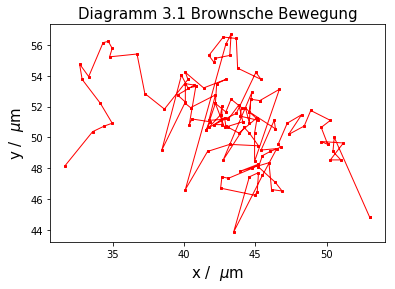

In [4]:
plt.plot(x, y, marker='s', color='red', linewidth=1, markersize=2.5)
plt.xlabel('x / '+' $\mu$'+'m', fontsize =15)
plt.ylabel('y / '+' $\mu$'+'m', fontsize = 15)
plt.title('Diagramm 3.1 Brownsche Bewegung', fontsize =15)
plt.savefig('figures/brown1.pdf', format='PDF')

## VIII.2 Berechnung des mittleren Verschiebungsquadrates und dessen Fehler

In [5]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i + 1
r_squared=dx**2+dy**2

In [6]:
r_squared_mean=np.mean(r_squared)
print("r_squared_mean= " ,r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= " ,r_squared_mean_std)
dt_mean=np.mean(dt)
dt_std = np.std(dt)/np.sqrt(len(dt))
print("dt_mean= ", dt_mean)
print('dt_std', dt_std)

r_squared_mean=  3.0027327452229295
r_squared_mean_std=  0.7096037556294105
dt_mean=  1.0196433121019108
dt_std 0.003113952909947842


In [7]:
T = 23.4+273.15
dT = 0.1
eta = 9.2e-4
deta = 0.1e-4
a = 0.5*755e-9
da = 0.5*30e-9


k_Boltzmann = 6*np.pi*a*eta*r_squared_mean*10**(-12)/(4*T*dt_mean)
d_k_Boltzmann= np.sqrt((dT/T)**2+(deta/eta)**2+(da/a)**2+(r_squared_mean_std/r_squared_mean)**2+(dt_std/dt_mean)**2)*k_Boltzmann

D = k_Boltzmann*T/(6*np.pi*eta*a)
d_D = np.sqrt((d_k_Boltzmann/k_Boltzmann)**2+(dT/T)**2+(deta/eta)**2+(da/a)**2)*D

print('k_Boltzmann = ' + str(k_Boltzmann), ' +- ', str(d_k_Boltzmann))
print('D = ' + str(D) + ' +- ' + str(d_D))

k_Boltzmann = 1.6252358430228065e-23  +-  3.8989840164251404e-24
D = 7.362213603483169e-13 +- 1.792066619598242e-13


## VIII.3 Kontrollverteilung

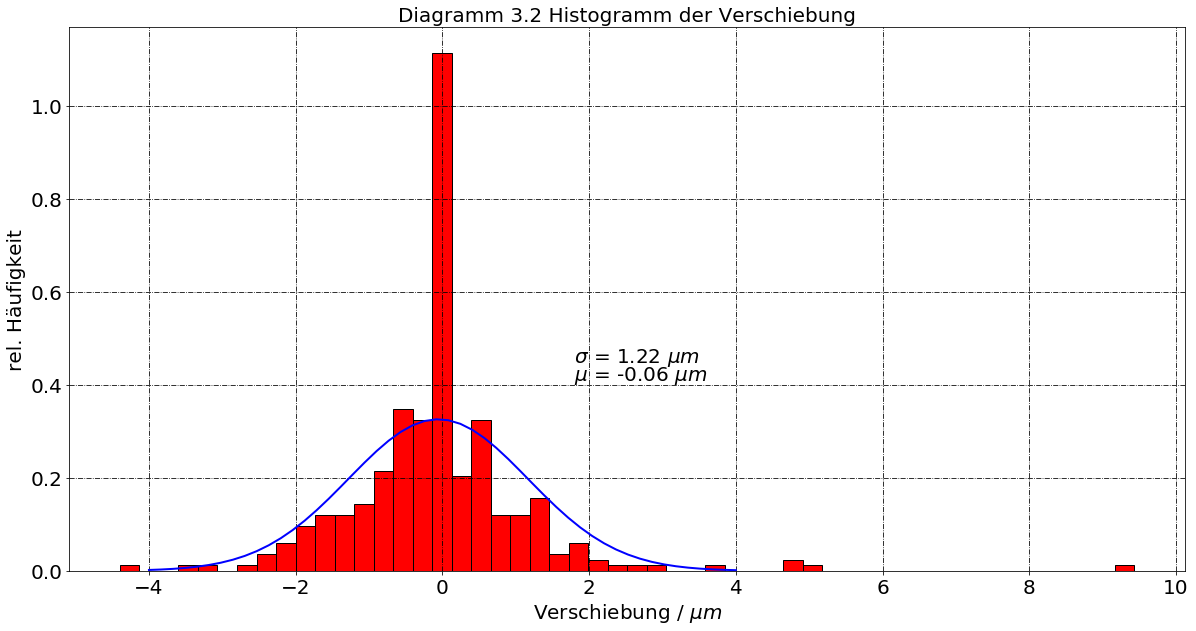

In [8]:
plt.figure(figsize=(20,10))

all_data=np.append(dx,dy)

plt.hist(all_data, normed=1, color='r', bins='auto', ec = 'black')
plt.grid(color='black', linestyle='-.')

mu=np.mean(all_data)
sigma=np.std(all_data)
gauss = mlab.normpdf(np.linspace(-4,4), mu , sigma)
plt.plot(np.linspace(-4,4), gauss, 'b-', linewidth=2)
plt.text(1.8,0.41, s = '${\mu}$ = ' + str(round(mu,2)) + ' ${\mu}m$', fontsize = 20)
plt.text(1.8, 0.45, s = '${\sigma}$ = ' + str(round(sigma, 2))+' ${\mu}m$', fontsize = 20)
plt.xlabel('Verschiebung / ${\mu}m$', fontsize = 20)
plt.ylabel('rel. Häufigkeit', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Diagramm 3.2 Histogramm der Verschiebung', fontsize=20)
plt.savefig('figures/brown2.pdf', format='PDF')

## VIII.4 Kumulative Verteilung der Verschiebungsquadrate

In [9]:
def linear(x,a,b):
    return a*x+b

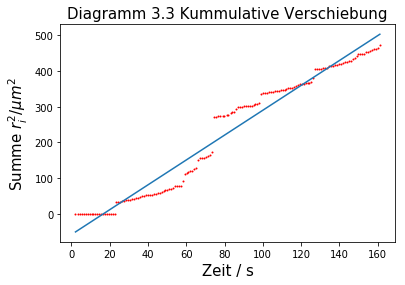

In [10]:
r_kumm=np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker='.', markersize= 2, color='red', linewidth=0)
plt.xlabel('Zeit / s', fontsize = 15)
plt.ylabel('Summe $r_i^2 /\mu m^2$', fontsize = 15)
plt.title('Diagramm 3.3 Kummulative Verschiebung', fontsize = 15)

popt, pcov = curve_fit(linear, t[:-1], r_kumm)
plt.plot(t[:-1], linear(t[:-1],*popt))

plt.savefig('figures/brown3.pdf', format='PDF')